# Import libraries

Import python libraries for data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, ScalarFormatter

from warnings import filterwarnings
filterwarnings('ignore')

# Load Data

Load data from 'MoviesOnStreamingPlatform.csv' dataset

In [2]:
# dataset available on
# https://www.kaggle.com/datasets/ruchi798/movies-on-netflix-prime-video-hulu-and-disney

df = pd.read_csv('MoviesOnStreamingPlatform.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Directors        16018 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16309 non-null  object 
 13  Language         16130 non-null  object 
 14  Runtime          16152 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.9+ MB


In [3]:
df.isna().sum()

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Directors            726
Genres               275
Country              435
Language             614
Runtime              592
dtype: int64

# Data Exploration

Check the first movies by release year

In [4]:
df.sort_values(by='Year').head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
4467,4468,A Trip to the Moon,1902,all,8.2,100%,0,0,1,0,Georges Méliès,"Short,Action,Adventure,Comedy,Fantasy,Sci-Fi",France,"None,French",13.0
8795,8796,From the Manger to the Cross,1912,7+,5.7,NaN,0,0,1,0,Sidney Olcott,"Biography,Drama",United States,English,60.0
9917,9918,Fatty Joins the Force,1913,NaN,5.3,NaN,0,0,1,0,George Nichols,"Comedy,Short",United States,English,12.0
10170,10171,The Speed Kings,1913,NaN,5.0,NaN,0,0,1,0,Wilfred Lucas,"Short,Action,Comedy",United States,English,8.0
6257,6258,A Fool There Was,1915,NaN,5.8,80%,0,0,1,0,Frank Powell,Drama,United States,English,67.0


Check the last movies by release year

In [5]:
df.sort_values(by='Year').tail()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
3463,3464,Har Kisse Ke Hisse Kaamyaab,2020,7+,NaN,NaN,1,0,0,0,Hardik Mehta,Drama,India,Hindi,109.0
2795,2796,Captain Underpants: Epic Choice-o-rama,2020,NaN,6.3,NaN,1,0,0,0,NaN,"Animation,Short,Action,Adventure,Comedy",United States,English,NaN
2110,2111,Tom Papa: You're Doing Great!,2020,NaN,7.1,NaN,1,0,0,0,Gregory Jacobs,Comedy,United States,English,60.0
1739,1740,The Stand at Paxton County,2020,NaN,6.4,NaN,1,0,0,0,Brett Hedlund,Thriller,United States,English,NaN
3417,3418,John Henry,2020,18+,3.5,NaN,1,0,0,0,Will Forbes,"Drama,Thriller",United States,English,91.0


Convert objects with 0 or 1 to boolean type

In [6]:
streamers = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

# Convert columns to boolean type
for column in streamers:
    df[column] = df[column].astype(bool)

Check if there are any anomaly in data and see the distribution of movies per year

The movies produced peak per year was in 2017


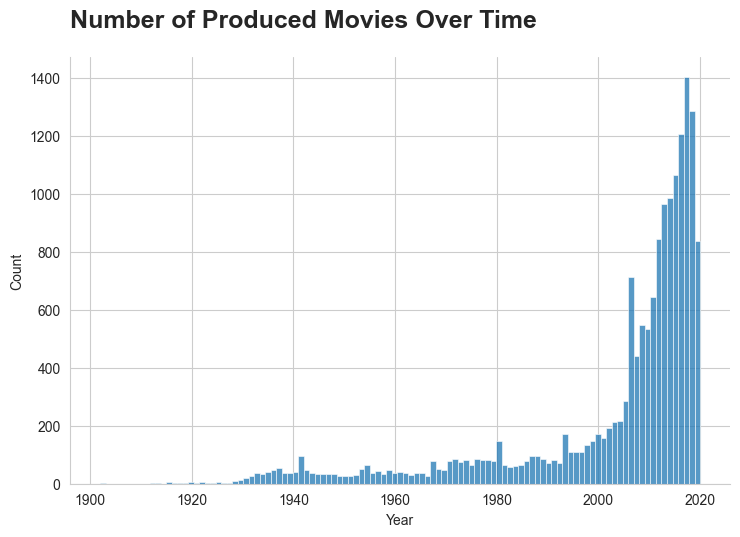

In [7]:
# Check if there are any anomaly
sns.set_style('whitegrid')
sns.displot(data=df, x='Year', aspect=1.5, bins=len(df['Year'].unique()))
plt.title('Number of Produced Movies Over Time', fontsize=18, fontweight='bold', loc='left', y=1.05)
print('The movies produced peak per year was in', df['Year'].value_counts().idxmax())

How much the amount of produced movies increased by the changing of the century to the peak (2017)?

In [8]:
amount_per_year = df['Year'].value_counts()
# Increase from 2000 to 2017
print(f'Increased by {amount_per_year[2017]/amount_per_year[2000]:.2%}')

Increased by 814.53%


## Check the variaty and variation of streamer's catalog

In [9]:
# Create a streamers dataframe separated from the original
streamers_df = df[:]
streamers_df['Streamer'] = streamers_df[streamers].idxmax(axis=1)
streamers_df = streamers_df.sort_values(by='Year').reset_index(drop=True)

Total movies: 16744


<Figure size 1200x600 with 0 Axes>

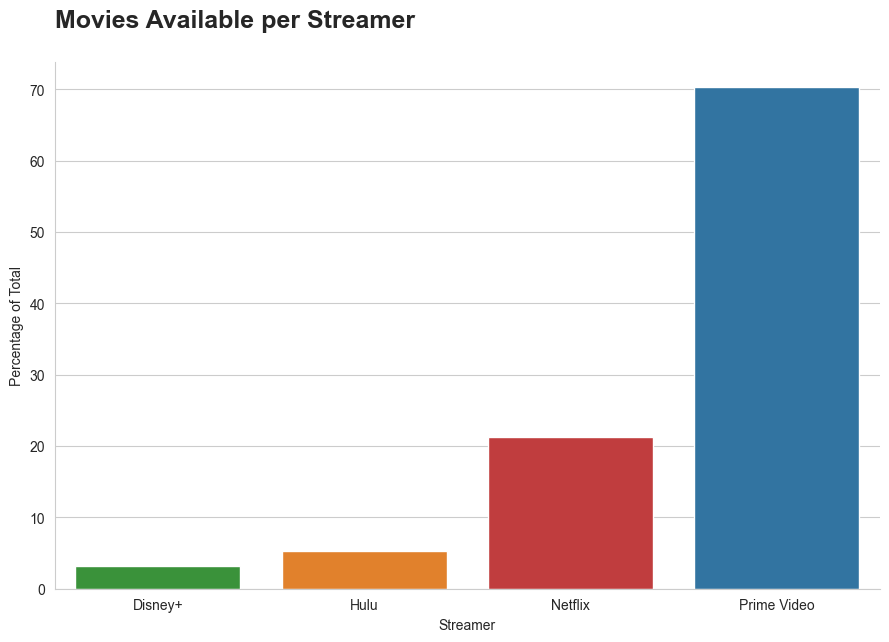

In [10]:
streamer_palette_colors = {'Netflix': 'tab:red', 'Prime Video':'tab:blue', 'Hulu': 'tab:orange', 'Disney+': 'tab:green'}

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.catplot(
    data=streamers_df.sort_values(by='Year').groupby(by='Streamer').count()/streamers_df.shape[0]*100,
    x='Streamer', y='ID',
    hue='Streamer',
    palette=streamer_palette_colors,
    kind='bar', height=6, aspect=1.5
)
plt.ylabel('Percentage of Total')
plt.title('Movies Available per Streamer', fontsize=18, fontweight='bold', loc='left', y=1.05)

print('Total movies:', streamers_df.shape[0])

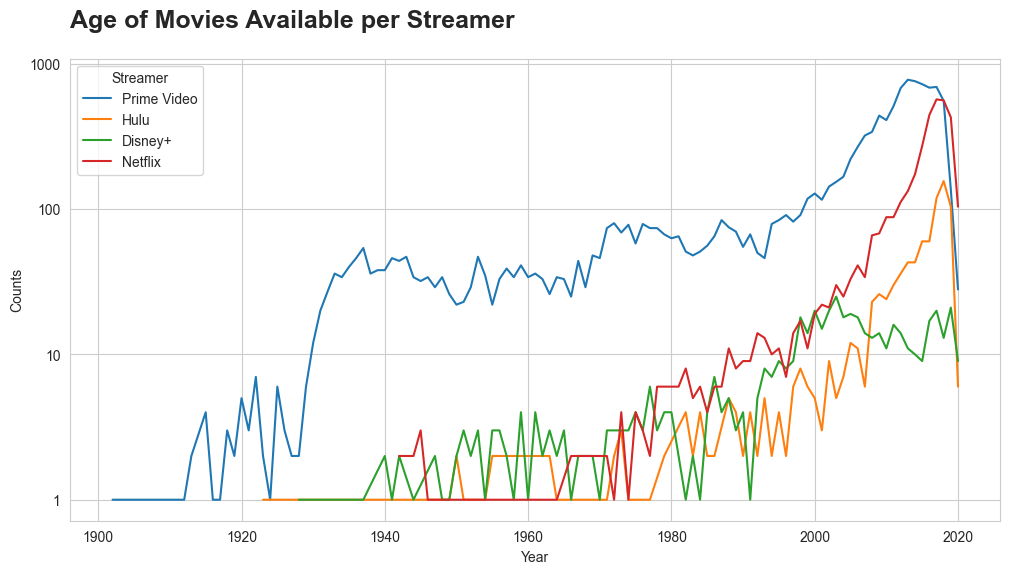

In [11]:
# Check if there are any anomaly
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.lineplot(data=streamers_df.groupby(['Year', 'Streamer']).size().reset_index(name='Counts'), x='Year', y='Counts', hue='Streamer', palette=streamer_palette_colors)
plt.title('Age of Movies Available per Streamer', fontsize=18, fontweight='bold', loc='left', y=1.05)

plt.yscale('log')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Disable scientific notation


Netflix difference in amount of titles from 2000-2017: 2994.74%
Hulu difference in amount of titles from 2000-2017: 2066.67%
Prime Video difference in amount of titles from 2000-2017: 586.92%
Disney+ difference in amount of titles from 2000-2017: 104.76%


Text(0, 0.5, 'Change (%)')

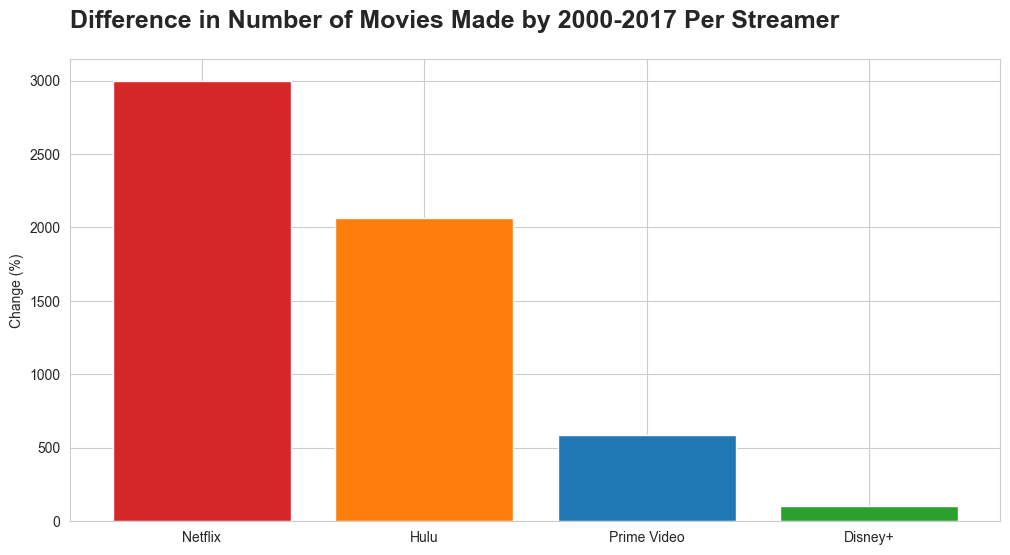

In [12]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

# Increase per Streamer
for streamer in streamers:
    amount_per_year = df[df[streamer]]['Year'].value_counts()
    
    # Increase from 2000 to 2017
    print(f'{streamer.title()} difference in amount of titles from 2000-2017: {amount_per_year[2017]/amount_per_year[2000]:.2%}')

    plt.bar(streamer.title(), amount_per_year[2017]/amount_per_year[2000]*100, color=streamer_palette_colors[streamer.title()])

plt.title('Difference in Number of Movies Made by 2000-2017 Per Streamer', fontsize=18, fontweight='bold', loc='left', y=1.05)
plt.ylabel('Change (%)')

Text(0, 0.5, 'Average IMBd Rate')

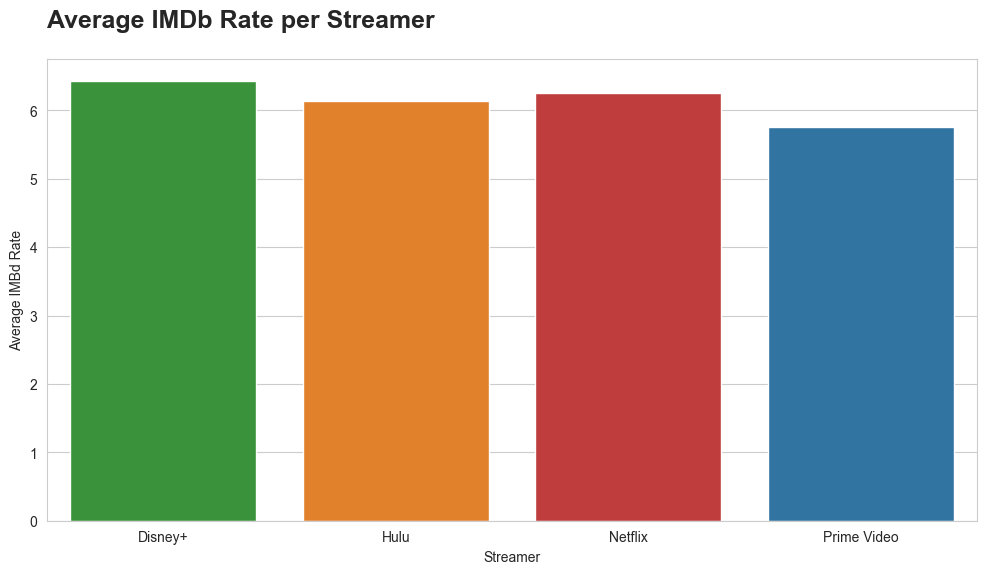

In [13]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.barplot(data=streamers_df.groupby('Streamer').aggregate({'IMDb':'mean'}), x='Streamer', y='IMDb', hue='Streamer', palette=streamer_palette_colors)
plt.title('Average IMDb Rate per Streamer', fontsize=18, fontweight='bold', loc='left', y=1.05)
plt.ylabel('Average IMBd Rate')

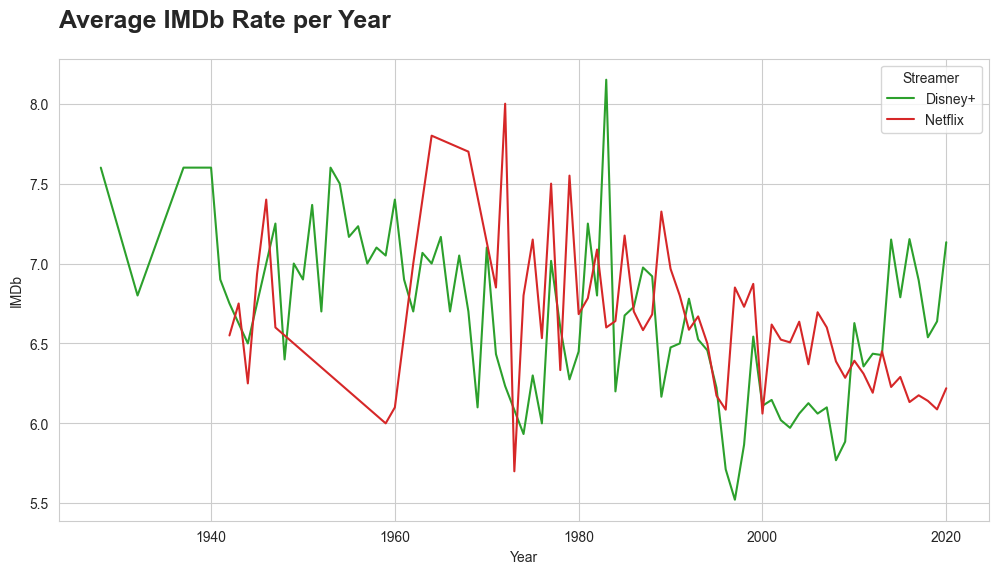

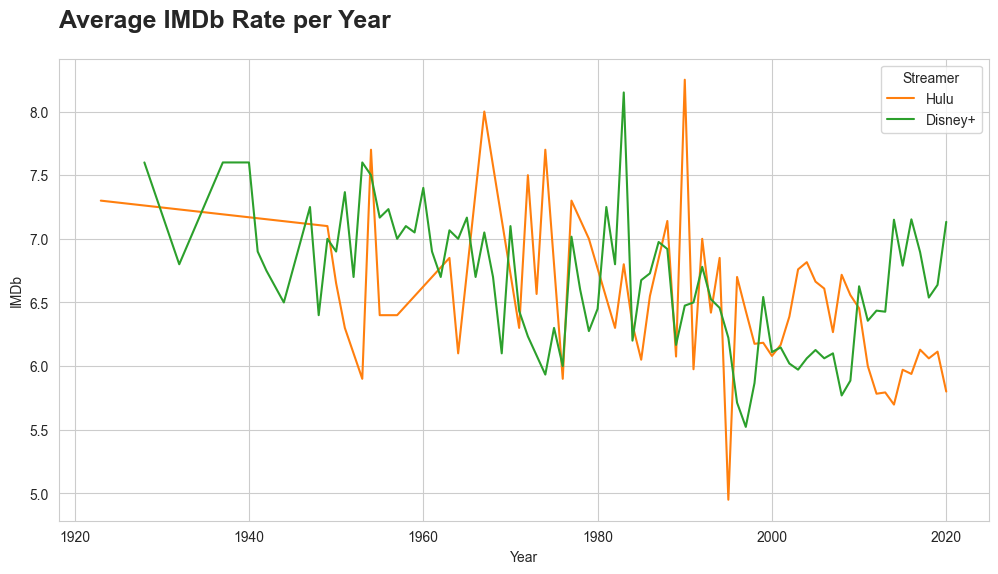

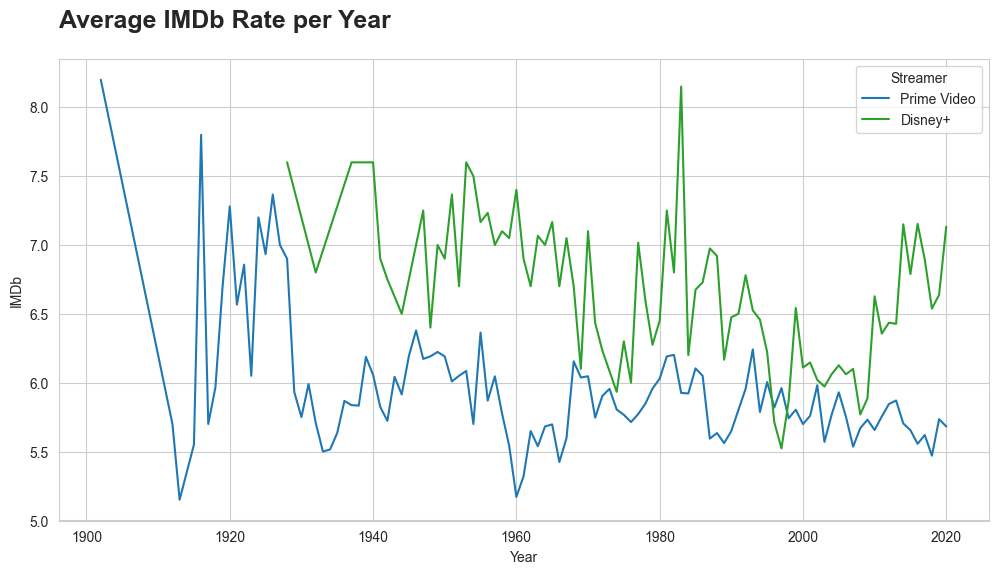

In [14]:
# IMDb per Streamer per Year
imdb_per_year = streamers_df.groupby(['Year', 'Streamer']).aggregate({'IMDb':'mean'}).reset_index().sort_values(by='Year')

for streamer in streamers:
    if streamer == 'Disney+':
        continue
    plt.figure(figsize=(12,6))
    sns.set_style('whitegrid')
    sns.lineplot(
        data=imdb_per_year.loc[(imdb_per_year.Streamer == 'Disney+')|(imdb_per_year.Streamer == streamer)],
        x='Year',
        y='IMDb',
        hue='Streamer',
        palette=streamer_palette_colors)
    plt.title('Average IMDb Rate per Year', fontsize=18, fontweight='bold', loc='left', y=1.05)

## How genres are distributed  in streamers

Check the amount of movies made per year by genre

In [15]:
df_genres = df.loc[(~df.Genres.isna())&(~df.IMDb.isna())]

genres = df_genres.Genres.unique()
unique_genres = list(set([genre for item in genres for genre in str(item).split(',')]))

# How many unique genres the data has?
len(unique_genres)

27

In [16]:
def sorted_movies_per_year_by_genre(cutted_df:pd.DataFrame) -> dict:
    movies_per_year_by_genre = dict()
    for genre in unique_genres:
        amount = cutted_df.loc[cutted_df.Genres.str.contains(genre)].groupby(by='Year').count()['Title'].sum()
        movies_per_year_by_genre.update({genre:amount})

    return {k: v for k, v in sorted(movies_per_year_by_genre.items(), key=lambda item: item[1], reverse=True)}


def concatenate_genres(series:pd.Series) -> str:
    return ','.join(series)


def genres_frequency_over_time(start:int, end:int, max_genres:int) -> plt.show:
    # Cut the data in the specific year range
    cutted_df = df_genres.loc[(df.Year >= start)&(df.Year <= end)].sort_values(by='Year')

    # Get all information about the cutted data
    genres = list(sorted_movies_per_year_by_genre(cutted_df).keys())[:max_genres]
    total_per_year = cutted_df.groupby(by='Year').count()['Title']
    all_data = pd.DataFrame(total_per_year.index, columns=['Year'])

    sum_genres_per_year = [len(str(data).split(',')) for data in cutted_df.groupby(by='Year').agg({'Genres':concatenate_genres}).values]
    genre_palette_temp = []

    # Calculate the percentage of each genre based on how much it appear
    for genre in genres:
        # Get the count of movies per year for each genre
        data = cutted_df.loc[cutted_df['Genres'].str.contains(genre)].groupby(by='Year').count()['Title']
        data = data.reindex(total_per_year.index, fill_value=0)
        counts = data.values / sum_genres_per_year * 100
        
        all_data[genre] = counts

    # Plot the figure and set style using seaborn
    plt.figure(figsize=(15,6))
    sns.set_style('whitegrid')
    plt.stackplot(all_data['Year'], [all_data[genre] for genre in genres], labels=all_data.columns[1:]) #, colors=genre_palette_temp)

    # Force integer x_label
    ax = plt.gca()  # Get the current axis

    # Force integer labels on the x-axis
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Set title and label's name
    plt.title(f'Top {max_genres} Genres Frequency Over Time ({start}-{end})', fontsize=18, fontweight='bold', loc='left', y=1.05)
    plt.xlabel('Year')
    plt.ylabel('Frequency of Genre (% of total)')
    plt.legend(loc='upper right')
    plt.show()

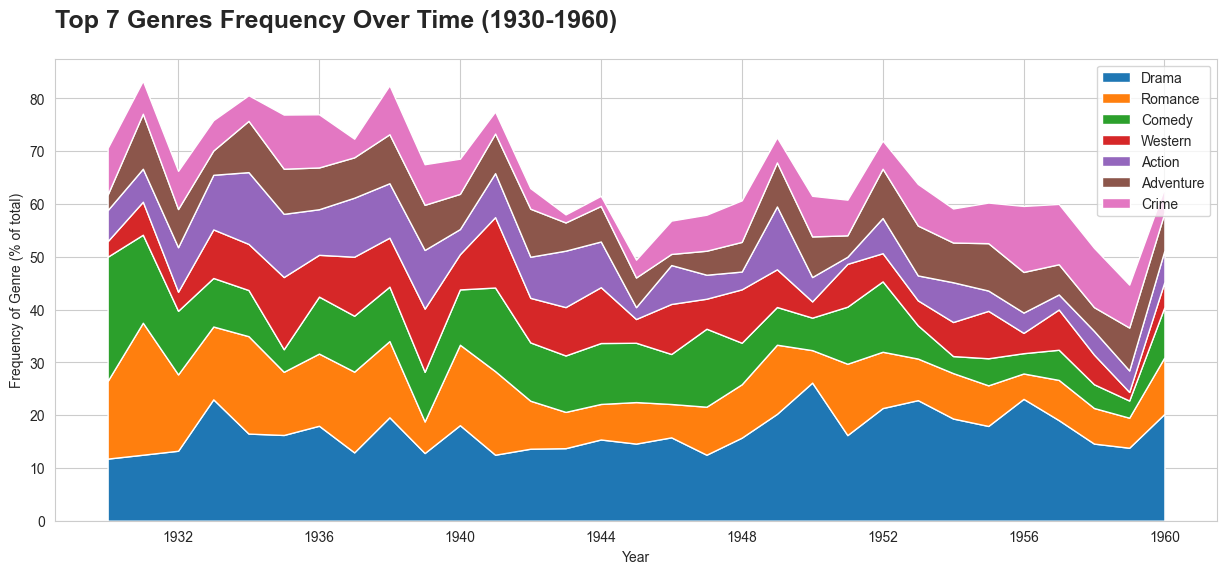

In [17]:
genres_frequency_over_time(start=1930, end=1960, max_genres=7)

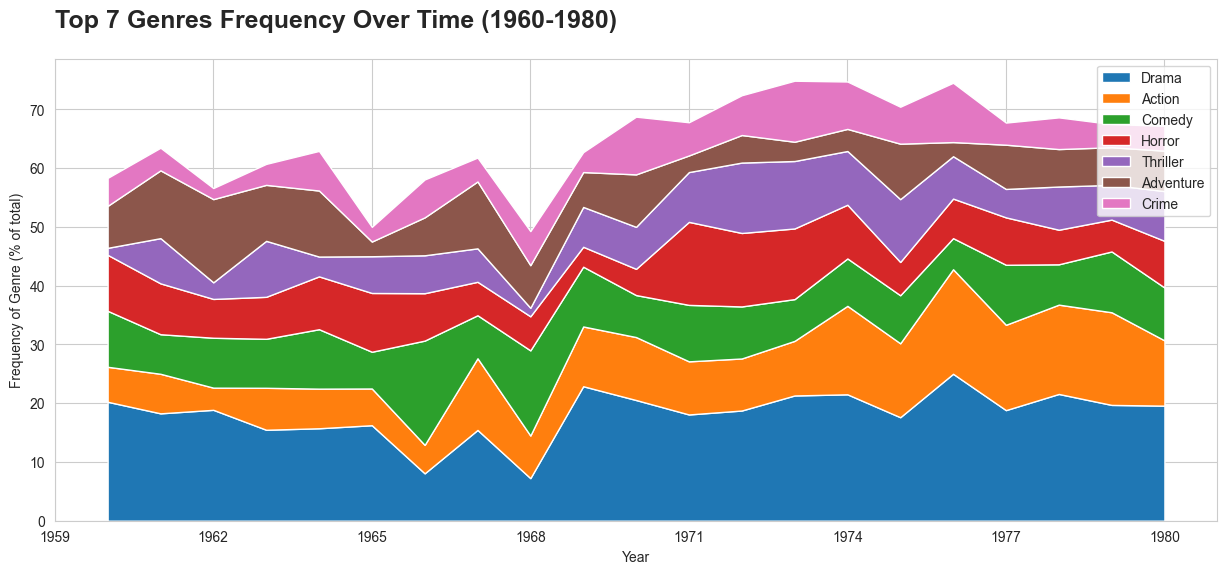

In [18]:
genres_frequency_over_time(start=1960, end=1980, max_genres=7)

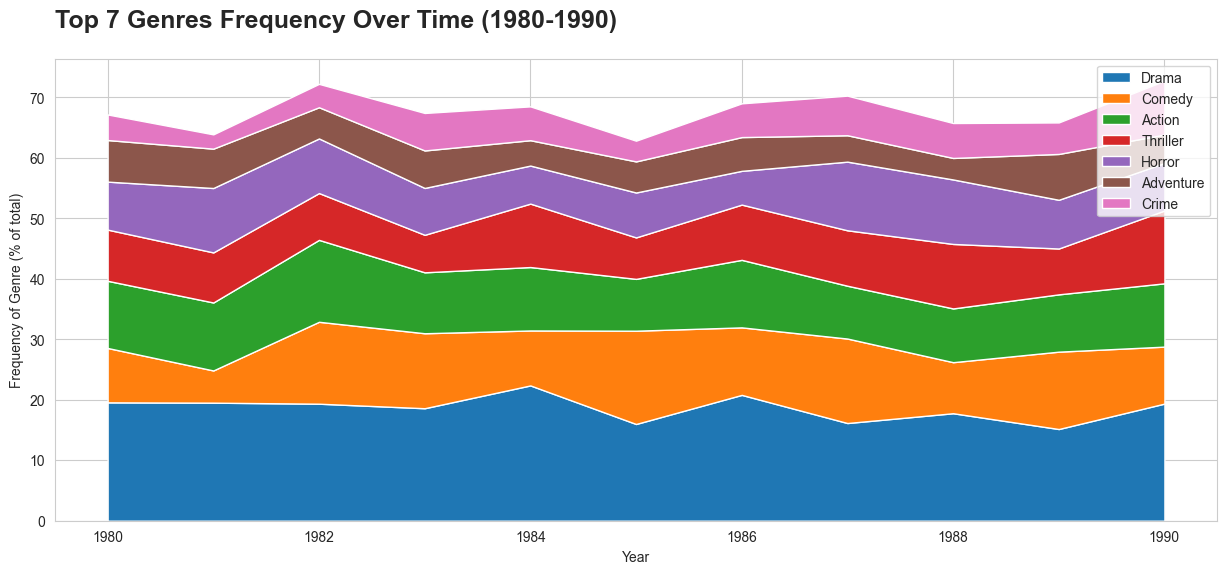

In [19]:
genres_frequency_over_time(start=1980, end=1990, max_genres=7)

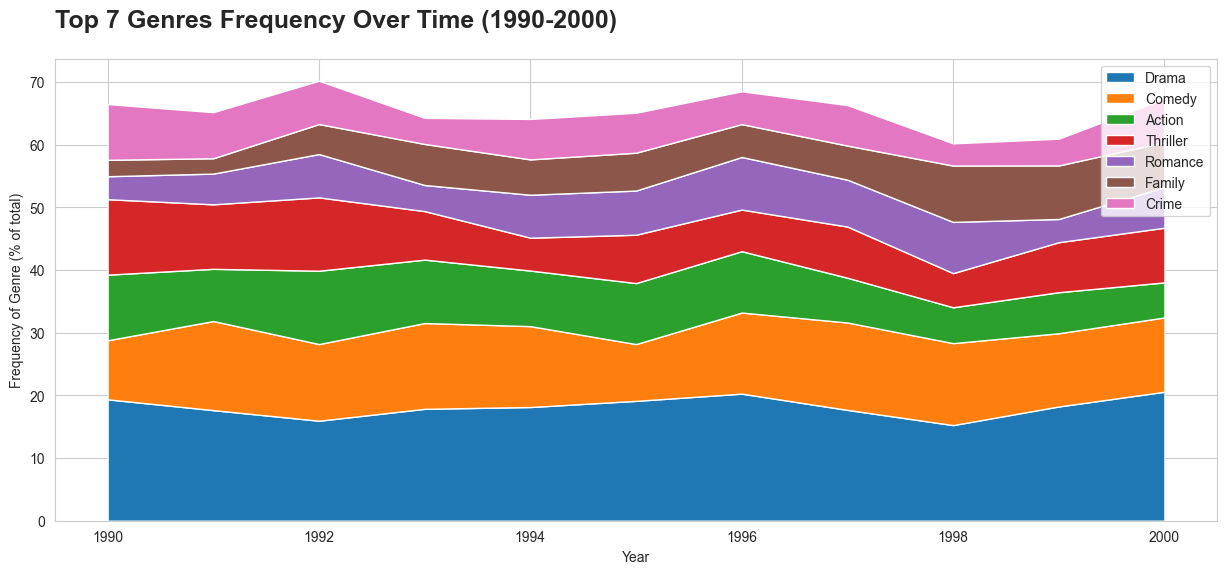

In [20]:
genres_frequency_over_time(start=1990, end=2000, max_genres=7)

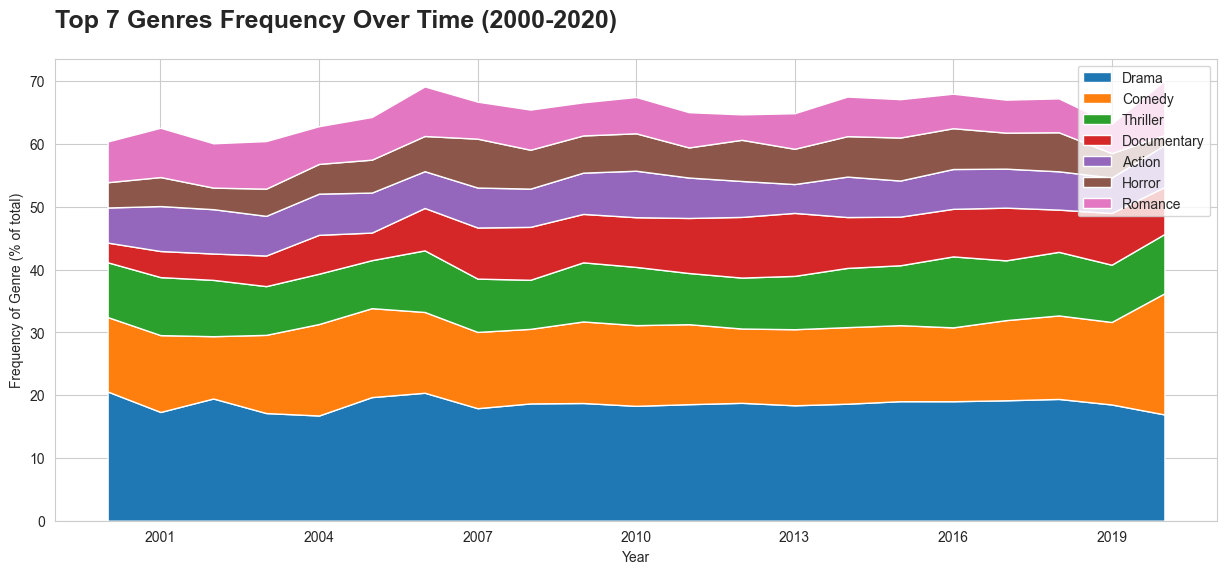

In [21]:
genres_frequency_over_time(start=2000, end=2020, max_genres=7)

Text(0.0, 1.05, 'Quantity of Movies per Genre')

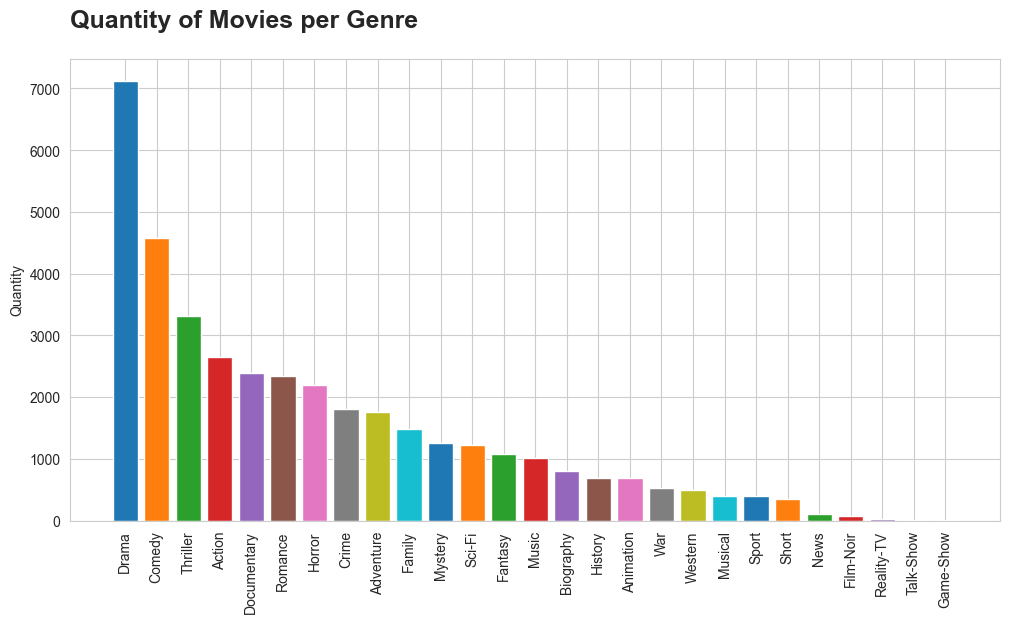

In [22]:
palette = sns.color_palette("husl", 27)
genre_palette = {genre: color for genre, color in zip(unique_genres, palette)} # fix

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

genre_mean = {}
for genre in unique_genres:
    genre_mean[genre] = (df_genres.loc[df_genres['Genres'].str.contains(genre)].IMDb.count())

genre_mean = sorted(genre_mean.items(), key=lambda x: x[1], reverse=True)

for genre, avg_imdb in genre_mean:
    plt.bar(genre, avg_imdb, label=genre)

plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.title('Quantity of Movies per Genre', fontsize=18, fontweight='bold', loc='left', y=1.05)

Text(0.0, 1.05, 'Average IMDb Rate per Genre - Overall')

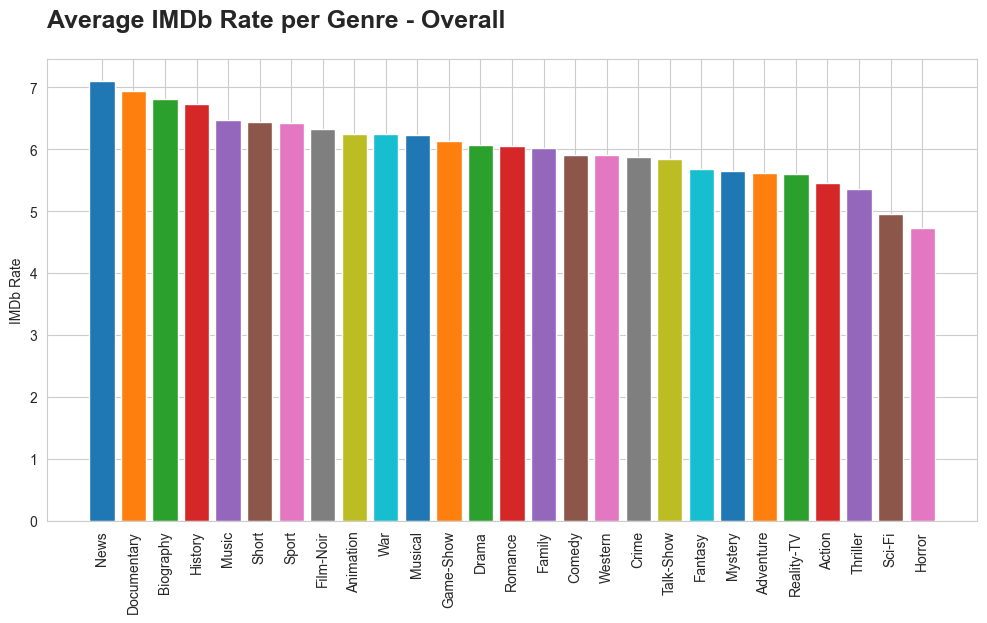

In [23]:
palette = sns.color_palette("husl", 27)
genre_palette = {genre: color for genre, color in zip(unique_genres, palette)} # fix

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

genre_mean = {}
for genre in unique_genres:
    genre_mean[genre] = (df_genres.loc[df_genres['Genres'].str.contains(genre)].IMDb.mean())

genre_mean = sorted(genre_mean.items(), key=lambda x: x[1], reverse=True)

for genre, avg_imdb in genre_mean:
    plt.bar(genre, avg_imdb, label=genre)

plt.ylabel('IMDb Rate')
plt.xticks(rotation=90)
plt.title('Average IMDb Rate per Genre - Overall', fontsize=18, fontweight='bold', loc='left', y=1.05)

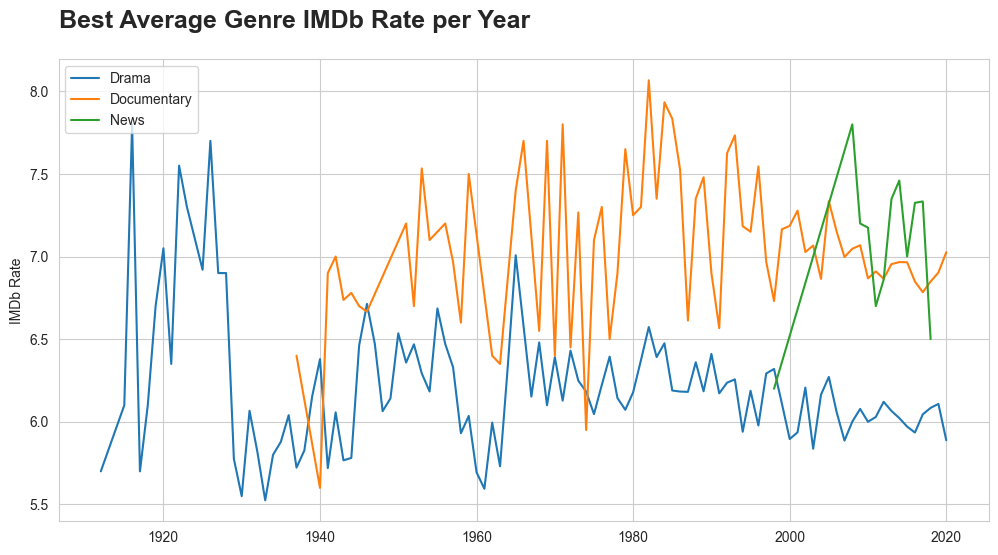

In [24]:
top_3_genres = ['Drama', 'Documentary', 'News']

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
for genre in top_3_genres:
    df_genre_grade = df_genres.loc[df_genres.Genres.str.contains(genre)].groupby(by='Year')['IMDb'].mean().reset_index()
    plt.plot(df_genre_grade['Year'], df_genre_grade['IMDb'], label=genre)
plt.ylabel('IMDb Rate')
plt.title('Best Average Genre IMDb Rate per Year', fontsize=18, fontweight='bold', loc='left', y=1.05)
plt.legend(loc='upper left')

## Which streamer has the better catalog for top 3 genres?

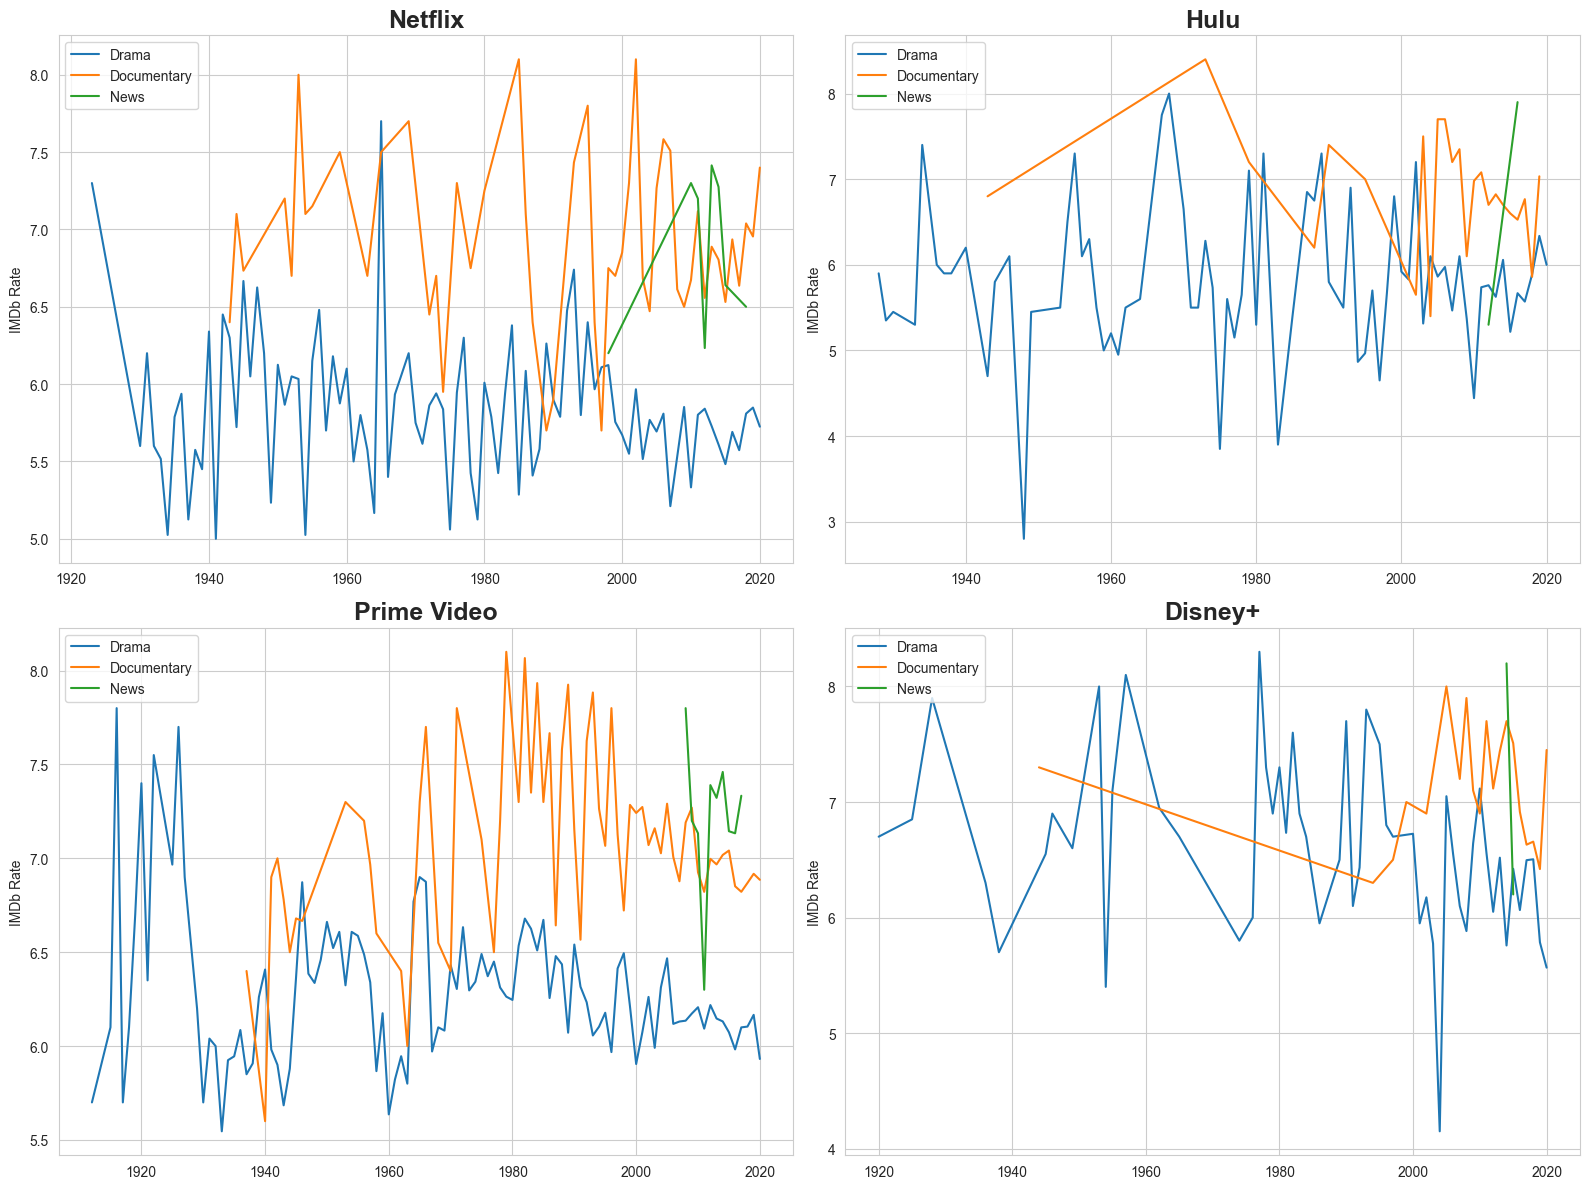

In [25]:
top_3_genres = ['Drama', 'Documentary', 'News']

# Create a 2x2 subplot structure
fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # Adjust size as needed
axs = axs.flatten()  # Flatten the array to simplify indexing

# Loop over each streamer and plot on a separate subplot
for idx, streamer in enumerate(streamers):
    for genre in top_3_genres:
        df_genre_grade = df_genres.loc[
            (df_genres['Genres'].str.contains(genre)) & 
            (streamers_df['Streamer'] == streamer)
        ].groupby(by='Year')['IMDb'].mean().reset_index()
        axs[idx].plot(df_genre_grade['Year'], df_genre_grade['IMDb'], label=genre)
        sns.set_style('whitegrid')

    axs[idx].set_ylabel('IMDb Rate')
    axs[idx].set_title(f'{streamer}', fontsize=18, fontweight='bold')
    axs[idx].legend(loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()